In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import datajoint as dj
dj.config['database.host'] = os.environ['DJ_HOST']
dj.config['database.user'] = os.environ['DJ_USER']
dj.config['database.password'] = os.environ['DJ_PASS']
dj.config['enable_python_native_blobs'] = True
# dj.config['schema_name'] = "anix_nnfabrik_bias_transfer1"
dj.config['schema_name'] = "anix_nnfabrik_bias_transfer_test2"

import matplotlib.pyplot as plt
import numpy as np
from bias_transfer.dataset import dataset_loader
from bias_transfer.trainer import trainer
from bias_transfer.models import resnet_builder
from bias_transfer.analysis import *
from bias_transfer.main import *


from bias_transfer.tables.trained_model import *
from bias_transfer.tables.trained_transfer_model import *
import nnfabrik as nnf
# nnf.config['repos'] = ['/notebooks/nnfabrik']
# from nnfabrik.main import *
schema

Connecting anix@sinzlab.chlkmukhxp6i.eu-central-1.rds.amazonaws.com:3306


Schema `anix_nnfabrik_bias_transfer1`

In [20]:
analysis = Analyzer()

NameError: name 'schema' is not defined

In [21]:
from bias_transfer.experiments.self_attention import experiments

In [22]:
analysis.add_data(experiments, TrainedModel(), transfer_level=0)

KeyError: '[1] not found in axis'

In [19]:
analysis.add_data(experiments, TrainedTransferModel(), transfer_level=1)

KeyError: '[1] not found in axis'

In [17]:
analysis.df

,name,comment,training_progress,test_acc,test_loss,dev_noise_acc,dev_noise_loss
0,Noise + Adv Regression (lambda 1.0 gamma 10.0),Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
1,Noise + Adv Regression (lambda 1.0 gamma 10.0)...,Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
2,Noise + Adv Regression (lambda 1.0 gamma 50.0),Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
3,Noise + Adv Regression (lambda 1.0 gamma 50.0)...,Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
4,Noise + Adv Regression (lambda 1.0 gamma 1.0),Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
...,...,...,...,...,...,...,...
91,Noise + Adv Classification (lambda 5.0 gamma 5...,Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
92,Noise + Adv Classification (lambda 5.0 gamma 1.0),Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
93,Noise + Adv Classification (lambda 5.0 gamma 1...,Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."
94,Noise + Adv Classification (lambda 5.0 gamma 5.0),Default.Default.Default,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,"{'noise_snr': {'5.0_1.0': 70.2, '4.0_1.0': 70....","{'noise_snr': {'5.0_1.0': 1.4852378815412521, ..."


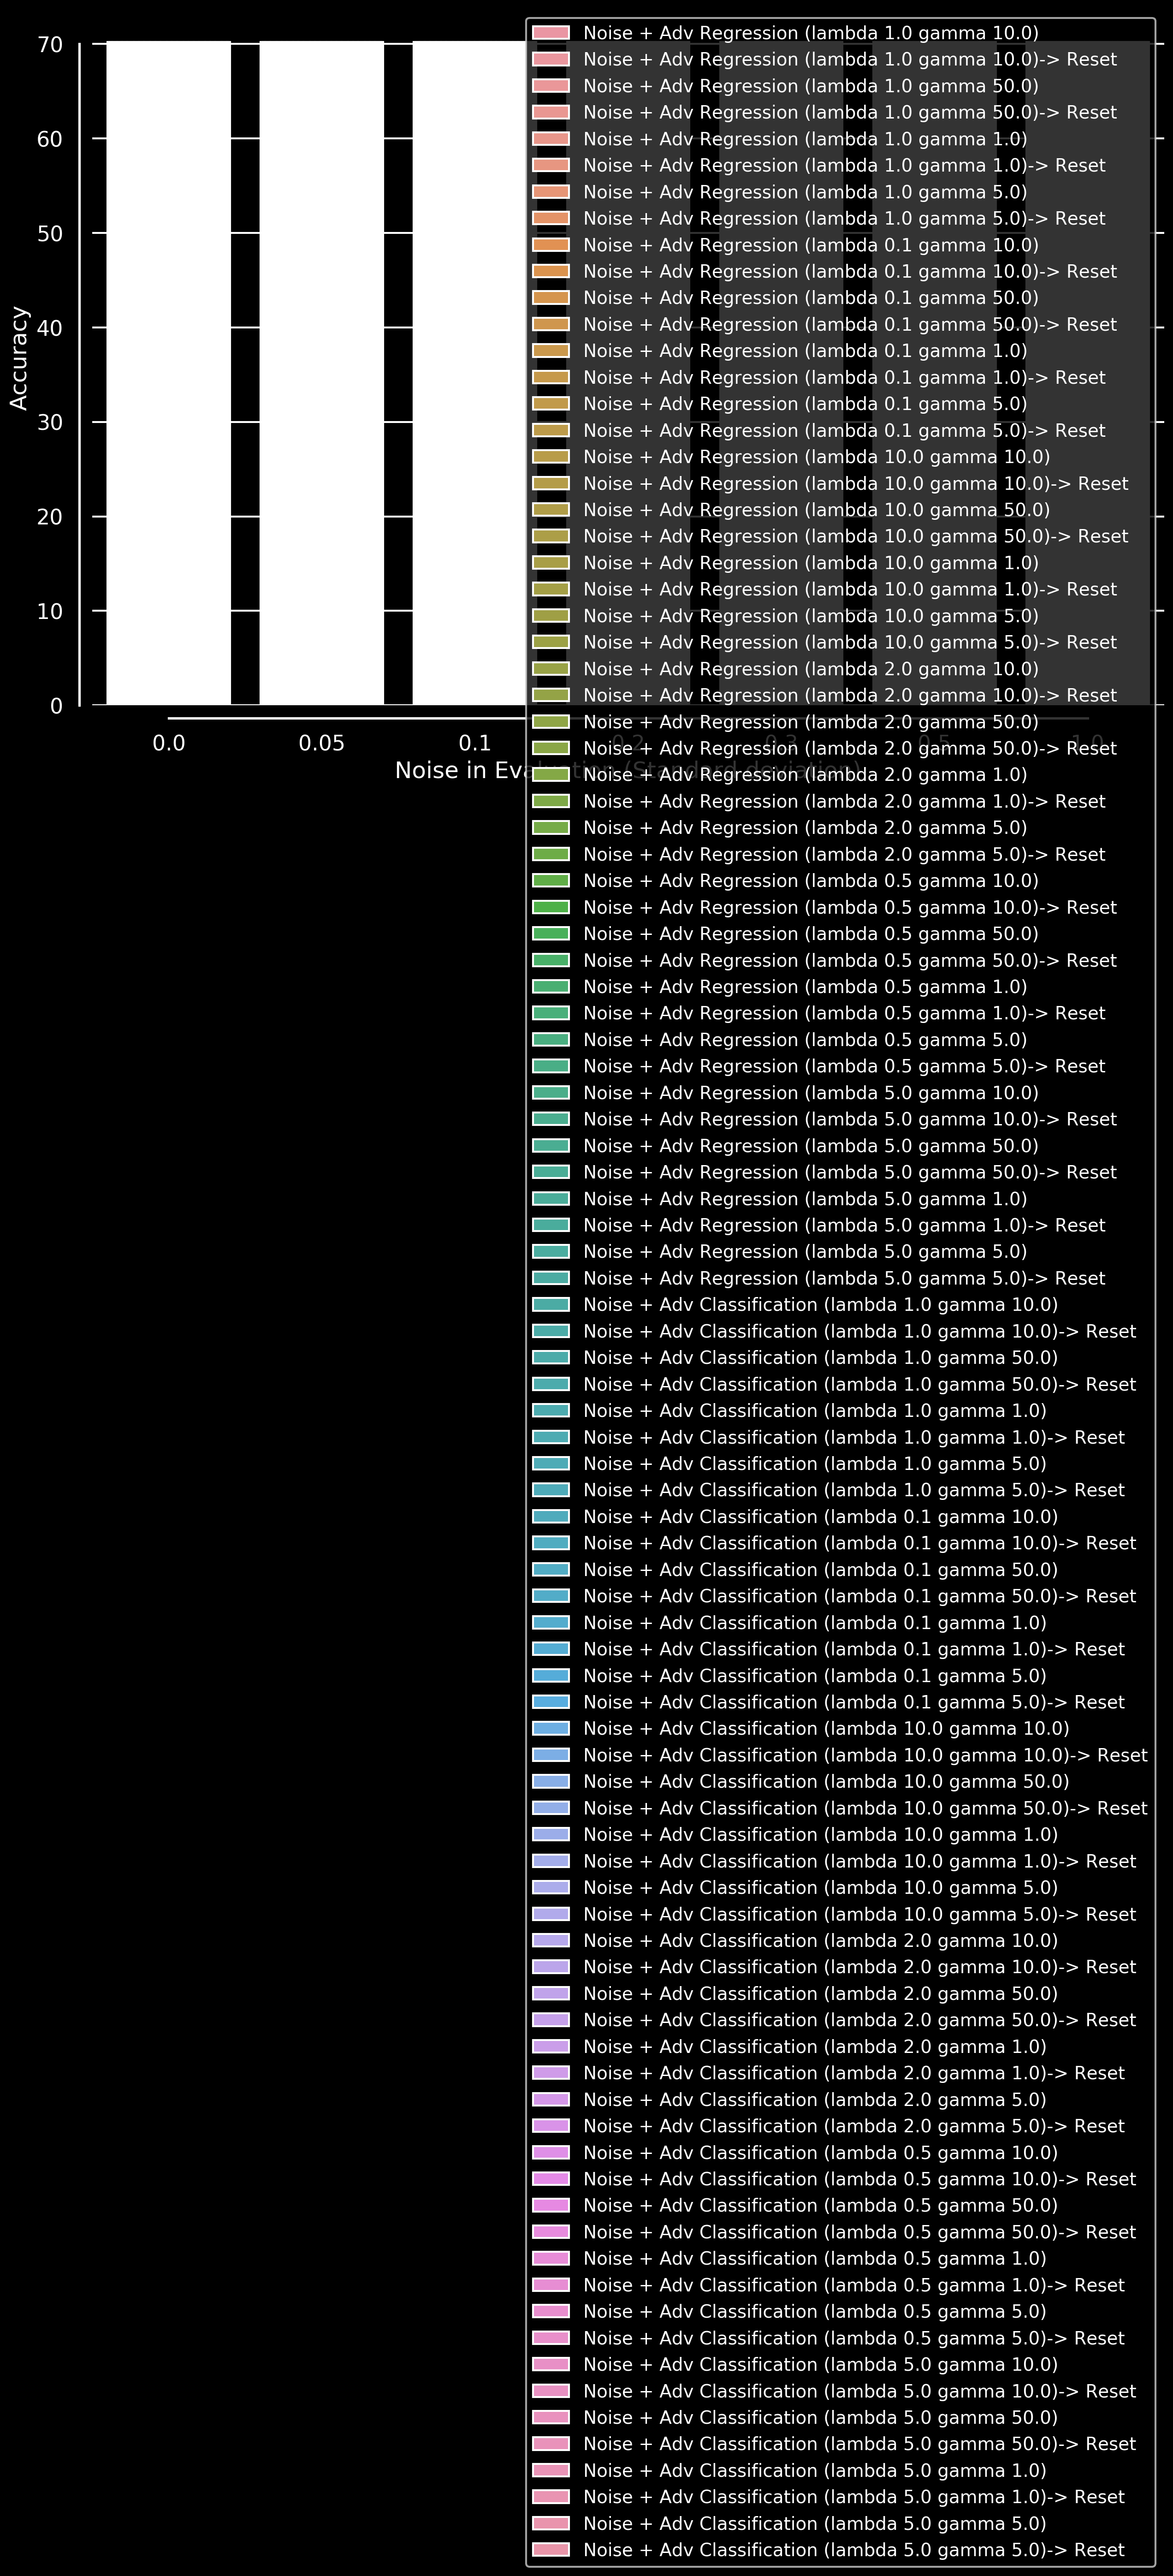

In [18]:
x = analysis.plot(to_plot="dev_noise_acc", 
       noise_measure="std",
       kind=None, 
       plot_method=sns.barplot,
        save="logit_matching.png"
       )

# Visualization

In [3]:
config = Config(apply_data_augmentation=False, apply_data_normalization=False, batch_size=128)

In [4]:
data_loaders, model, train_fct = nnf.builder.get_all_parts(dataset_fn=config.dataset_fn,
                                                               dataset_config=config.dataset,
                                                               trainer_fn=config.trainer_fn,
                                                               trainer_config=config.trainer,
                                                               model_fn=config.model_fn,
                                                               model_config=config.model,
                                                           seed=8
                                                               )

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


==> Starting visualization 


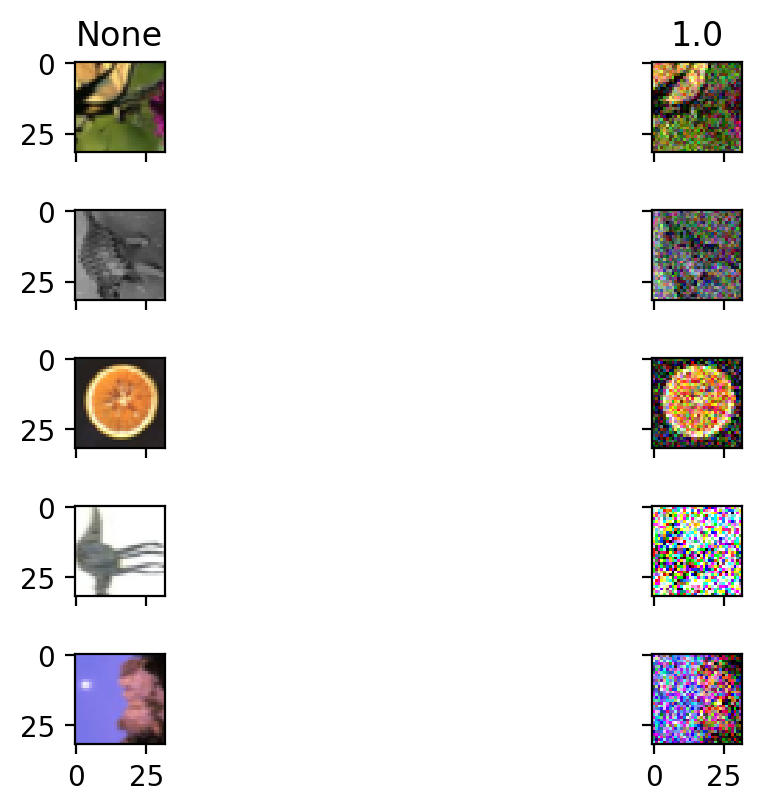

In [5]:
visualize_data(data_loader=data_loaders['val'], num_samples=5, add_noise=True 
               ,noise_snrs=({None:1.0}, {1.0:1.0}), noise_stds=())